<a href="https://colab.research.google.com/github/junghyun9108/2025_DL/blob/main/DL_1_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [23]:
def step_function(x):
    if x < thres:
        return 0
    else:
        return 1

In [24]:
def gen_training_data(data_point):
    x1 = np.random.random(data_point) # 0 ~ 1 사이 아무 수나 만드는 함수
    x2 = np.random.random(data_point)
    y = ((x1 + x2) > 1).astype(int)
    training_set = [((x1[i],x2[i]), y[i]) for i in range(len(x1))]

    return training_set

In [25]:
thres = 0.5
w = np.array([0.3,0.9])
lr = 0.1 # learning rate
data_point = 100
epoch = 10 # 데이터를 얼마나 많이 학습시킬 것인가
training_set = gen_training_data(data_point)

In [26]:
training_set[0:5]

[((np.float64(0.2605128722239186), np.float64(0.7254165742398233)),
  np.int64(0)),
 ((np.float64(0.3888917630995641), np.float64(0.343538086375638)),
  np.int64(0)),
 ((np.float64(0.19957016381915604), np.float64(0.29434199577074693)),
  np.int64(0)),
 ((np.float64(0.7264442432725325), np.float64(0.5473253045552956)),
  np.int64(1)),
 ((np.float64(0.026490993835585286), np.float64(0.33699873575409)),
  np.int64(0))]

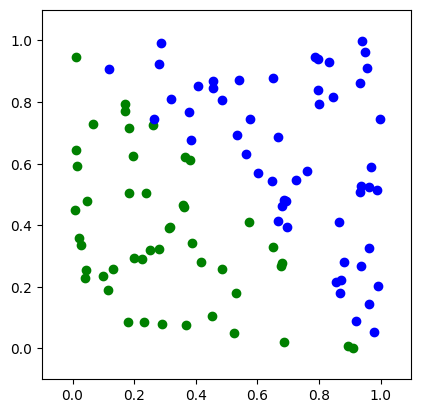

In [27]:
plt.figure(0)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

for x , y in training_set:
    if y == 1:
        plt.plot(x[0],x[1], 'bo')
    else:
        plt.plot(x[0],x[1], 'go')
plt.show()

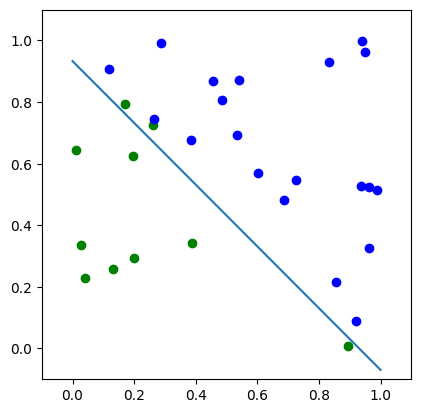

In [ ]:
%matplotlib inline
from time import sleep

plt.figure(0)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

xx = np.linspace(0,1,50)
for i in range(epoch):
    cnt = 0
    for x , y in training_set:
        clear_output(wait=True)
        u = sum(x * w)
        error = y - step_function(u)
        for index , value in enumerate(x):
            w[index] = w[index] + lr * error * value

        for xs , ys in training_set[0:cnt]:
            plt.ylim(-0.1,1.1)
            plt.xlim(-0.1,1.1)
            ax = plt.gca()
            ax.set_aspect('equal', adjustable='box')

            if ys == 1:
                plt.plot(xs[0],xs[1],'bo')
            else:
                plt.plot(xs[0],xs[1],'go')

        yy = -w[1]/w[0] * xx + thres/w[0] # <== w[0] * yy + w[1] * xx = thres

        plt.plot(xx , yy)
        plt.show()
        cnt = cnt + 1
        sleep(0.01)